# Financial Inclusion in Africa


Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa, and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enable households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other finance services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The objective of this competition is to create a machine learning model to predict which individuals are most likely to have or use a bank account. The models and solutions developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes

## Importing important Libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Reading and Exploring the dataset

In [2]:
df = pd.read_csv("Train_v2.csv")
df.head(10)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
5,Kenya,2018,uniqueid_6,No,Rural,No,7,26,Female,Spouse,Married/Living together,Primary education,Informally employed
6,Kenya,2018,uniqueid_7,No,Rural,Yes,7,32,Female,Spouse,Married/Living together,Primary education,Self employed
7,Kenya,2018,uniqueid_8,No,Rural,Yes,1,42,Female,Head of Household,Married/Living together,Tertiary education,Formally employed Government
8,Kenya,2018,uniqueid_9,Yes,Rural,Yes,3,54,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
9,Kenya,2018,uniqueid_10,No,Urban,Yes,3,76,Female,Head of Household,Divorced/Seperated,No formal education,Remittance Dependent


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [4]:
df.shape

(23524, 13)

## Data Cleaning

In [5]:
df.isnull().any()

country                   False
year                      False
uniqueid                  False
bank_account              False
location_type             False
cellphone_access          False
household_size            False
age_of_respondent         False
gender_of_respondent      False
relationship_with_head    False
marital_status            False
education_level           False
job_type                  False
dtype: bool

In [6]:
df.duplicated().any()

False

## Exploratory Data Analysis

In [7]:
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [8]:
df.groupby("year").agg("count")

,country,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
year,,,,,,,,,,,,
2016,8735,8735,8735,8735,8735,8735,8735,8735,8735,8735,8735,8735
2017,6620,6620,6620,6620,6620,6620,6620,6620,6620,6620,6620,6620
2018,8169,8169,8169,8169,8169,8169,8169,8169,8169,8169,8169,8169


In [9]:
df.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [15]:
df.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
uniqueid,,,,,,,,,,,,
uniqueid_1,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
uniqueid_2,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
uniqueid_3,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
uniqueid_4,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
uniqueid_5,Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [10]:
df.groupby("bank_account").mean()

,year,household_size,age_of_respondent
bank_account,,,
No,2016.937413,3.823026,38.675292
Yes,2017.211051,3.641606,39.598128


From the above table, we can conclude that;
1. Average household size - the average of the household size is less in the customers with bank accounts
2. Average age of respondent - the average age is higher in customers with bank accounts

In [11]:
account = df[df.bank_account=="Yes"]
account.shape

(3312, 13)

In [12]:
no_account = df[df.bank_account=="No"]
no_account.shape

(20212, 13)

### Impact on location_type on bank  account

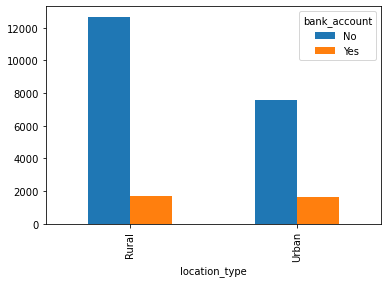

In [13]:
pd.crosstab(df.location_type,df.bank_account).plot(kind='bar')

### Impact of cellphone access on bank account

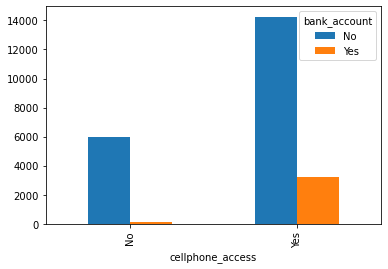

In [14]:
pd.crosstab(df.cellphone_access,df.bank_account).plot(kind='bar')

#####  Customers with no cellphone access are less likely to have a bank account

### Impact of gender_of_respondent on bank account

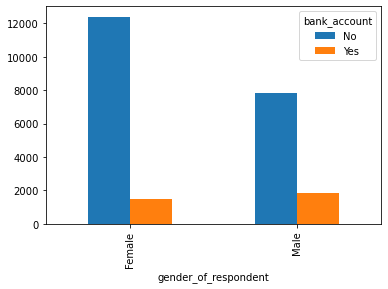

In [15]:
pd.crosstab(df.gender_of_respondent,df.bank_account).plot(kind='bar')

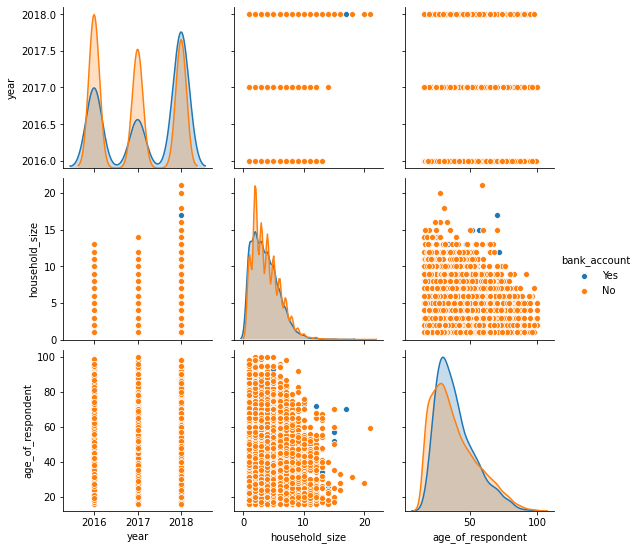

In [16]:
sns.pairplot(df, hue = "bank_account")

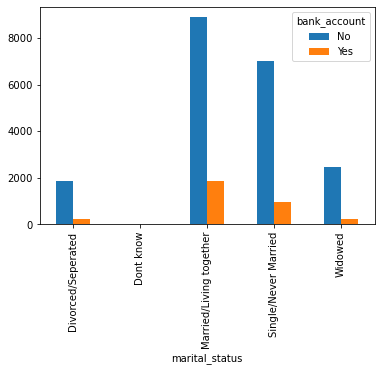

In [17]:
pd.crosstab(df.marital_status,df.bank_account).plot(kind='bar')

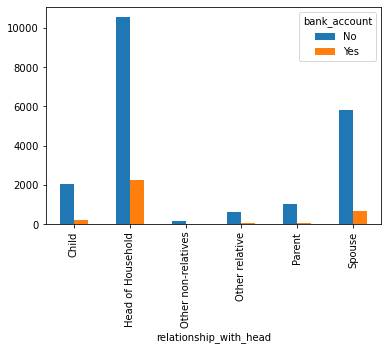

In [18]:
pd.crosstab(df.relationship_with_head,df.bank_account).plot(kind='bar')

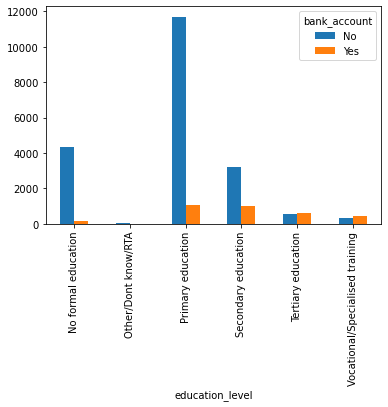

In [19]:
pd.crosstab(df.education_level,df.bank_account).plot(kind='bar')

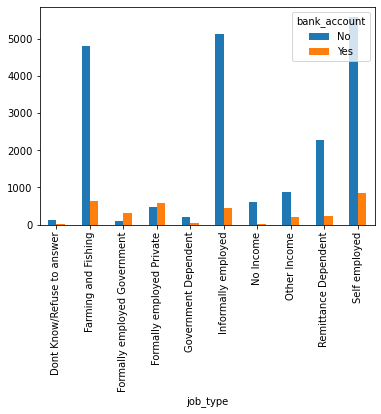

In [20]:
pd.crosstab(df.job_type,df.bank_account).plot(kind='bar')

## Summary of columns needed
1. year
2. cellphone access
3. education level
4. job type 
5. gender

## Feature Engineering

In [21]:
df.head(3)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed


In [22]:
subdf = df[["country", "year", "bank_account", "cellphone_access","education_level", "job_type", "gender_of_respondent" ]]
subdf.head()

,country,year,bank_account,cellphone_access,education_level,job_type,gender_of_respondent
0,Kenya,2018,Yes,Yes,Secondary education,Self employed,Female
1,Kenya,2018,No,No,No formal education,Government Dependent,Female
2,Kenya,2018,Yes,Yes,Vocational/Specialised training,Self employed,Male
3,Kenya,2018,No,Yes,Primary education,Formally employed Private,Female
4,Kenya,2018,No,No,Primary education,Informally employed,Male


In [23]:
X = subdf.drop(["bank_account"], axis = 1)
X.head()

,country,year,cellphone_access,education_level,job_type,gender_of_respondent
0,Kenya,2018,Yes,Secondary education,Self employed,Female
1,Kenya,2018,No,No formal education,Government Dependent,Female
2,Kenya,2018,Yes,Vocational/Specialised training,Self employed,Male
3,Kenya,2018,Yes,Primary education,Formally employed Private,Female
4,Kenya,2018,No,Primary education,Informally employed,Male


In [24]:
y = subdf[["bank_account"]]
y.head()

,bank_account
0,Yes
1,No
2,Yes
3,No
4,No


In [25]:
X.dtypes

country                 object
year                     int64
cellphone_access        object
education_level         object
job_type                object
gender_of_respondent    object
dtype: object

In [37]:
country = pd.get_dummies(X_res["country"], drop_first=True)
cellphone = pd.get_dummies(X_res["cellphone_access"], drop_first=True)
education = pd.get_dummies(X_res["education_level"], drop_first=True)
job = pd.get_dummies(X_res["job_type"], drop_first=True)
gender = pd.get_dummies(X_res["gender_of_respondent"], drop_first=True)

In [38]:
X_res = X_res.drop(["gender_of_respondent", "job_type", "education_level", "cellphone_access", "country"], axis = 1)

In [40]:
X_res = pd.concat([country, X_res, cellphone,education, job, gender], axis = 1)
X_res.head()

,Rwanda,Tanzania,Uganda,year,Yes,Other/Dont know/RTA,Primary education,Secondary education,Tertiary education,Vocational/Specialised training,Farming and Fishing,Formally employed Government,Formally employed Private,Government Dependent,Informally employed,No Income,Other Income,Remittance Dependent,Self employed,Male
0,0,0,0,2018,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,2018,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,2018,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
3,0,0,0,2018,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,2018,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [41]:
y_res.head()

,bank_account
0,Yes
1,No
2,Yes
3,No
4,No


In [42]:
y_res['bank_account'] = y_res['bank_account'].map({'Yes': 1,'No': 0})

In [43]:
y_res.head()

,bank_account
0,1
1,0
2,1
3,0
4,0


## Handling imbalanced Dataset

In [26]:
# oversampling 

from imblearn.over_sampling import RandomOverSampler

In [27]:
account = y[y.bank_account=="Yes"]
account.shape

(3312, 1)

In [28]:
no_account = y[y.bank_account=="No"]
no_account.shape

(20212, 1)

In [29]:
over_samp = RandomOverSampler()

In [30]:
X_res, y_res = over_samp.fit_sample(X,y)

In [33]:
account = y_res[y_res.bank_account=="Yes"]
account.shape

(20212, 1)

In [34]:
no_account = y_res[y_res.bank_account=="No"]
no_account.shape

(20212, 1)

In [35]:
from collections import Counter

In [36]:
print(f"Original dataset shape {Counter(y)}")
print(f"Resampled dataset shape {Counter(y_res)}")

Original dataset shape Counter({'bank_account': 1})
Resampled dataset shape Counter({'bank_account': 1})


In [44]:
X_res.dtypes

Rwanda                             uint8
Tanzania                           uint8
Uganda                             uint8
year                               int64
Yes                                uint8
Other/Dont know/RTA                uint8
Primary education                  uint8
Secondary education                uint8
Tertiary education                 uint8
Vocational/Specialised training    uint8
Farming and Fishing                uint8
Formally employed Government       uint8
Formally employed Private          uint8
Government Dependent               uint8
Informally employed                uint8
No Income                          uint8
Other Income                       uint8
Remittance Dependent               uint8
Self employed                      uint8
Male                               uint8
dtype: object

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.25)

In [101]:
from sklearn.linear_model import LogisticRegression

In [102]:
model = LogisticRegression(max_iter=100000)

In [103]:
model.fit(X_train, y_train)

C:\Users\Mabel Karani\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(max_iter=100000)

In [104]:
model.score(X_test, y_test)

0.7495547199683357

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
modelr = RandomForestClassifier()

In [107]:
modelr.fit(X_train, y_train)

<ipython-input-107-5a187ef5e5d9>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelr.fit(X_train, y_train)


RandomForestClassifier()

In [108]:
modelr.score(X_test, y_test)

0.7622204630912329

### Test csv

In [123]:
test = pd.read_csv("Test_v2.csv")
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [124]:
test = test.set_index("uniqueid")
test.head()

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
uniqueid,,,,,,,,,,,
uniqueid_6056,Kenya,2018,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
uniqueid_6060,Kenya,2018,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
uniqueid_6065,Kenya,2018,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
uniqueid_6072,Kenya,2018,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
uniqueid_6073,Kenya,2018,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [128]:
test.shape

(10086, 11)

In [132]:
subdf = test[["country", "year", "cellphone_access","education_level", "job_type", "gender_of_respondent" ]]
subdf.head()

,country,year,cellphone_access,education_level,job_type,gender_of_respondent
uniqueid,,,,,,
uniqueid_6056,Kenya,2018,Yes,Secondary education,Formally employed Government,Male
uniqueid_6060,Kenya,2018,Yes,Vocational/Specialised training,Formally employed Private,Male
uniqueid_6065,Kenya,2018,No,No formal education,Remittance Dependent,Female
uniqueid_6072,Kenya,2018,No,Primary education,Remittance Dependent,Female
uniqueid_6073,Kenya,2018,No,Secondary education,Remittance Dependent,Male


In [133]:
subdf.shape

(10086, 6)

In [134]:
subdf.tail()

,country,year,cellphone_access,education_level,job_type,gender_of_respondent
uniqueid,,,,,,
uniqueid_2998,Uganda,2018,No,Primary education,Self employed,Female
uniqueid_2999,Uganda,2018,Yes,Primary education,Self employed,Male
uniqueid_3000,Uganda,2018,Yes,Secondary education,Other Income,Male
uniqueid_3001,Uganda,2018,Yes,Primary education,Self employed,Female
uniqueid_3002,Uganda,2018,Yes,Secondary education,Other Income,Male


In [135]:
country = pd.get_dummies(subdf["country"], drop_first=True)
cellphone = pd.get_dummies(subdf["cellphone_access"], drop_first=True)
education = pd.get_dummies(subdf["education_level"], drop_first=True)
job = pd.get_dummies(subdf["job_type"], drop_first=True)
gender = pd.get_dummies(subdf["gender_of_respondent"], drop_first=True)

In [136]:
subdf = subdf.drop(["gender_of_respondent", "job_type", "education_level", "cellphone_access", "country"], axis = 1)

In [137]:
subdf.shape

(10086, 1)

In [138]:
test = pd.concat([country,subdf, cellphone,education, job, gender], axis = 1)
test.head()

,Rwanda,Tanzania,Uganda,year,Yes,Other/Dont know/RTA,Primary education,Secondary education,Tertiary education,Vocational/Specialised training,Farming and Fishing,Formally employed Government,Formally employed Private,Government Dependent,Informally employed,No Income,Other Income,Remittance Dependent,Self employed,Male
uniqueid,,,,,,,,,,,,,,,,,,,,
uniqueid_6056,0,0,0,2018,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
uniqueid_6060,0,0,0,2018,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
uniqueid_6065,0,0,0,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
uniqueid_6072,0,0,0,2018,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
uniqueid_6073,0,0,0,2018,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1


In [139]:
test.shape

(10086, 20)

In [140]:
predicted = model.predict(test)

In [141]:
predicted.shape

(10086,)

In [142]:
predicted2 = modelr.predict(test)

In [143]:
predicted2.shape

(10086,)

In [144]:
from sklearn.metrics import confusion_matrix

In [145]:
conf = confusion_matrix(predicted,predicted2)
conf

array([[6699,  338],
       [ 396, 2653]], dtype=int64)

In [148]:

mydf = pd.DataFrame(predicted2, columns= ["bank_account"])

In [150]:
mydf.to_csv('submission1.csv', index=False) 

## Submission

In [151]:
submit = pd.read_csv("Test_v2.csv")
submit.head(1)

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government


In [152]:
subdf = submit[["uniqueid"]]

In [153]:
country = submit[["country"]]

In [154]:
account = pd.read_csv("submission1.csv")
account.head(1)

,bank_account
0,1


In [155]:
submission = pd.concat([subdf,country,account], axis = 1)

In [156]:
submission.head()

,uniqueid,country,bank_account
0,uniqueid_6056,Kenya,1
1,uniqueid_6060,Kenya,1
2,uniqueid_6065,Kenya,0
3,uniqueid_6072,Kenya,0
4,uniqueid_6073,Kenya,0


In [157]:
submission['uniqueid'] = submission[['uniqueid', 'country']].astype(str).agg(' x '.join, axis=1)

In [158]:
submission

,uniqueid,country,bank_account
0,uniqueid_6056 x Kenya,Kenya,1
1,uniqueid_6060 x Kenya,Kenya,1
2,uniqueid_6065 x Kenya,Kenya,0
3,uniqueid_6072 x Kenya,Kenya,0
4,uniqueid_6073 x Kenya,Kenya,0
...,...,...,...
10081,uniqueid_2998 x Uganda,Uganda,0
10082,uniqueid_2999 x Uganda,Uganda,0
10083,uniqueid_3000 x Uganda,Uganda,0
10084,uniqueid_3001 x Uganda,Uganda,0


In [159]:
submission = submission.drop(["country"], axis =1)
submission.head()

,uniqueid,bank_account
0,uniqueid_6056 x Kenya,1
1,uniqueid_6060 x Kenya,1
2,uniqueid_6065 x Kenya,0
3,uniqueid_6072 x Kenya,0
4,uniqueid_6073 x Kenya,0


In [160]:
submission.to_csv('submission.csv', index=False) 

## Using Logistic regression

In [161]:

mydf = pd.DataFrame(predicted, columns= ["bank_account"])

In [162]:
mydf.to_csv('submission2.csv', index=False) 

In [163]:
submit = pd.read_csv("Test_v2.csv")
submit.head(1)

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government


In [164]:
subdf = submit[["uniqueid"]]

In [165]:
country = submit[["country"]]

In [166]:
account = pd.read_csv("submission2.csv")
account.head(1)

,bank_account
0,1


In [167]:
submission = pd.concat([subdf,country,account], axis = 1)

In [168]:
submission['uniqueid'] = submission[['uniqueid', 'country']].astype(str).agg(' x '.join, axis=1)

In [169]:
submission.head()

,uniqueid,country,bank_account
0,uniqueid_6056 x Kenya,Kenya,1
1,uniqueid_6060 x Kenya,Kenya,1
2,uniqueid_6065 x Kenya,Kenya,0
3,uniqueid_6072 x Kenya,Kenya,0
4,uniqueid_6073 x Kenya,Kenya,0


In [170]:
submission = submission.drop(["country"], axis =1)
submission.head()

,uniqueid,bank_account
0,uniqueid_6056 x Kenya,1
1,uniqueid_6060 x Kenya,1
2,uniqueid_6065 x Kenya,0
3,uniqueid_6072 x Kenya,0
4,uniqueid_6073 x Kenya,0


In [171]:
submission.to_csv('submission_reg.csv', index=False) 

## other models

In [172]:
from sklearn.neighbors import KNeighborsClassifier

In [173]:
knn = KNeighborsClassifier()

In [174]:
knn.fit(X_train,y_train)

<ipython-input-174-889312abc571>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y_train)


KNeighborsClassifier()

In [175]:
knn.score(X_test,y_test)

0.7008707698396992

In [176]:
from sklearn.tree import DecisionTreeClassifier

In [177]:
tree = DecisionTreeClassifier()

In [178]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [179]:
tree.score(X_test, y_test)

0.7617257075004947